# Documentation - Database

In [1]:
import pandas as pd
import numpy as np
import math
from rdkit import Chem
import matplotlib.pyplot as plt
import seaborn as sns

## 모든 데이터 불러오기

In [2]:
df = pd.read_excel('./ALL_DB.xlsx')
df = df.rename({'Concentration (mol/L)':'Concentration'}, axis='columns')
df

,Solute SMILES,Solvent SMILES,LogS,Concentration,Solute InChIKey,Solvent InChIKey,Source
0,C1=CN(C=CN1C(C(Cl)(Cl)Cl)NC=O)C(C(Cl)(Cl)Cl)NC=O,O,-4.190000,0.000065,XEOXEBNPBKUGJH-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC
1,S(=O)(=O)(c1cc(ccc1)N(C)C)O,O,0.298000,1.986095,SOKSKPNEBIDBOU-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC
2,CCCCNC(=O)N1C2=CC=CC=C2N=C1NC(=O)OC,O,-4.882821,0.000013,RIOXQFHNBCKOKP-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,AAT
3,CCCCC(C)O,O,-0.872600,0.134091,QNVRIHYSUZMSGM-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,AqSolDB
4,O=C(OCC(C)C)c1ccccc1C(=O)OCC(C)C,O,-4.660000,0.000022,MGWAVDBGNNKXQV-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC
...,...,...,...,...,...,...,...
43114,n2c1ccccc1nc2C,OCCCCCC,0.128399,1.344000,NaN,ZSIAUFGUXNUGDI-UHFFFAOYSA-N,ONSC
43115,Oc1cc3c(cc1)[C@H]2CC[C@@]4([C@@H](O)[C@H](O)C[...,O,-4.950000,0.000011,PROQIPRRNZUXQM-ZXXIGWHRSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC
43116,O=C(O)\C(=C)CC(=O)O,CCCO,-0.013809,0.968705,LVHBHZANLOWSRM-UHFFFAOYSA-N,BDERNNFJNOPAEC-UHFFFAOYSA-N,ONSC
43117,O=C2\C=C(/N(N2c1ccccc1)C)C,CCO,0.353724,2.258000,VEQOALNAAJBPNY-UHFFFAOYSA-N,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,ONSC


In [3]:
list(set(df['Source']))

['AAT', 'AqSolDB', 'ESOL', 'BNNLab', 'NIST', 'DMSO', 'RDkit', 'ONSC']

## 각 데이터 출처에서 중복 제거

In [4]:
df_1 = df[df['Source'] == 'NIST'].sort_values(by=['Concentration'], ascending=False).drop_duplicates(['Solute InChIKey', 'Solvent InChIKey'], keep='first')
df_2 = df[df['Source'] == 'AqSolDB'].sort_values(by=['Concentration'], ascending=False).drop_duplicates(['Solute InChIKey', 'Solvent InChIKey'], keep='first')
df_3 = df[df['Source'] == 'AAT'].sort_values(by=['Concentration'], ascending=False).drop_duplicates(['Solute InChIKey', 'Solvent InChIKey'], keep='first')
df_4 = df[df['Source'] == 'DMSO'].sort_values(by=['Concentration'], ascending=False).drop_duplicates(['Solute InChIKey', 'Solvent InChIKey'], keep='first')
df_5 = df[df['Source'] == 'ESOL'].sort_values(by=['Concentration'], ascending=False).drop_duplicates(['Solute InChIKey', 'Solvent InChIKey'], keep='first')
df_6 = df[df['Source'] == 'RDkit'].sort_values(by=['Concentration'], ascending=False).drop_duplicates(['Solute InChIKey', 'Solvent InChIKey'], keep='first')
df_7 = df[df['Source'] == 'ONSC'].sort_values(by=['Concentration'], ascending=False).drop_duplicates(['Solute InChIKey', 'Solvent InChIKey'], keep='first')
df_8 = df[df['Source'] == 'BNNLab'].sort_values(by=['Concentration'], ascending=False).drop_duplicates(['Solute InChIKey', 'Solvent InChIKey'], keep='first')
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8], axis = 0)
df

,Solute SMILES,Solvent SMILES,LogS,Concentration,Solute InChIKey,Solvent InChIKey,Source
11832,CCCCCCCCC(O)=O,CC#N,2.065899,1.163855e+02,FBUKVWPVBMHYJY-UHFFFAOYSA-N,WEVYAHXRMPXWCK-UHFFFAOYSA-N,NIST
9512,O=C(O)C1=CC(N)=CC=C1O,C1CCOC1,1.760392,5.759594e+01,KBOPZPXVLCULAV-UHFFFAOYSA-N,WYURNTSHIVDZCO-UHFFFAOYSA-N,NIST
7105,CCCCCCCCCCCCN,CC#N,1.660411,4.575214e+01,JRBPAEWTRLWTQC-UHFFFAOYSA-N,WEVYAHXRMPXWCK-UHFFFAOYSA-N,NIST
23659,CCCCCCCC(O)=O,CC#N,1.617579,4.145521e+01,WWZKQHOCKIZLMA-UHFFFAOYSA-N,WEVYAHXRMPXWCK-UHFFFAOYSA-N,NIST
3619,CCCCCCCCCCC(O)=O,CC#N,1.149789,1.411851e+01,ZDPHROOEEOARMN-UHFFFAOYSA-N,WEVYAHXRMPXWCK-UHFFFAOYSA-N,NIST
...,...,...,...,...,...,...,...
15549,Clc1c(Cl)c(Cl)c2Oc3c(Oc2c1Cl)cc(Cl)c(Cl)c3,O,-9.950782,1.120000e-10,WCYYQNSQJHPVMG-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,BNNLab
9685,Clc1c(Cl)c(Cl)c2Oc3c(c(Cl)c(Cl)c(Cl)c3)Oc2c1Cl,O,-11.221848,6.000010e-12,WCLNVRQZUKYVAI-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,BNNLab
8520,Clc1c(Cl)c(Cl)c2c(c1Cl)oc1c(Cl)c(Cl)c(Cl)c(Cl)c21,O,-11.522879,2.999998e-12,RHIROFAGUQOFLU-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,BNNLab
38704,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)c1c(Cl)c(Cl)c(Cl)c(C...,O,-11.698970,2.000000e-12,ONXPZLFXDMAPRO-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,BNNLab


In [5]:
print('중복 제거 후')
print('Source', '\t\t', 'Solute', '\t', 'Solvent', '\t', 'Total')
print(df_7['Source'].iloc[0], '\t\t', len(list(set(df_7['Solute InChIKey']))), '\t\t', len(list(set(df_7['Solvent InChIKey']))), '\t\t', df_7.shape[0])
print(df_2['Source'].iloc[0], '\t', len(list(set(df_2['Solute InChIKey']))), '\t\t', len(list(set(df_2['Solvent InChIKey']))), '\t\t', df_2.shape[0])
print(df_3['Source'].iloc[0], '\t\t', len(list(set(df_3['Solute InChIKey']))), '\t\t', len(list(set(df_3['Solvent InChIKey']))), '\t\t', df_3.shape[0])
print(df_8['Source'].iloc[0], '\t\t', len(list(set(df_8['Solute InChIKey']))), '\t\t', len(list(set(df_8['Solvent InChIKey']))), '\t\t', df_8.shape[0])
print(df_6['Source'].iloc[0], '\t\t', len(list(set(df_6['Solute InChIKey']))), '\t\t', len(list(set(df_6['Solvent InChIKey']))), '\t\t', df_6.shape[0])
print(df_5['Source'].iloc[0], '\t\t', len(list(set(df_5['Solute InChIKey']))), '\t\t', len(list(set(df_5['Solvent InChIKey']))), '\t\t', df_5.shape[0])
print(df_1['Source'].iloc[0], '\t\t', len(list(set(df_1['Solute InChIKey']))), '\t\t', len(list(set(df_1['Solvent InChIKey']))), '\t\t', df_1.shape[0])
print(df_4['Source'].iloc[0], '\t\t', len(list(set(df_4['Solute InChIKey']))), '\t\t', len(list(set(df_4['Solvent InChIKey']))), '\t\t', df_4.shape[0])

중복 제거 후
Source 		 Solute 	 Solvent 	 Total
ONSC 		 3304 		 183 		 7237
AqSolDB 	 9982 		 1 		 9982
AAT 		 6087 		 1 		 6087
BNNLab 		 2070 		 4 		 2511
RDkit 		 1256 		 1 		 1256
ESOL 		 1116 		 1 		 1116
NIST 		 121 		 50 		 248
DMSO 		 83 		 1 		 83


## 맞지 않는 값 수정 및 제거

In [6]:
def SMILES_to_InChIKey(df, col, i):
    try:
        s = df[col].iloc[i]
        m = Chem.MolFromSmiles(s)
        inc = Chem.inchi.MolToInchi(m)
        key = Chem.inchi.InchiToInchiKey(inc)
    except:
        key = np.nan
    return key

In [7]:
for i in range(df.shape[0]):
    if 'ons' in str(df['Solute InChIKey'].iloc[i]):
        print(df['Solute InChIKey'].iloc[i])
        # 잘못된 InChIKey 수정
        df['Solute InChIKey'].iloc[i] = SMILES_to_InChIKey(df, 'Solute SMILES', i)

ons13
ons9
ons11
ons8
ons39
ons71
ons58
ons59
ons33
ons25
ons69
ons50
ons1
ons7
ons16
ons70
ons21
ons20
ons4
ons27
ons42
ons38
ons3
ons19
ons61
ons22
ons12
ons15
ons10
ons29
ons62
ons14
ons34
ons57
ons43
ons37
ons55
ons40
ons41
ons5
ons17
ons56
ons46
ons26
ons24
ons31
ons48
ons68
ons45
ons67
ons28
ons36
ons2
ons23
ons47
ons63


/home/mhlee/anaconda3/envs/mhlee/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
for i in range(df.shape[0]):
    if len(str(df['Solute InChIKey'].iloc[i])) < 6:
        df['Solute InChIKey'].iloc[i] = 'No'
    if len(str(df['Solvent InChIKey'].iloc[i])) < 6:
        df['Solvent InChIKey'].iloc[i] = 'No'
        
df = df[df['Solute InChIKey'] != 'No']
df = df[df['Solvent InChIKey'] != 'No']
df = df.dropna(axis=0).reset_index(drop=True)
df

,Solute SMILES,Solvent SMILES,LogS,Concentration,Solute InChIKey,Solvent InChIKey,Source
0,CCCCCCCCC(O)=O,CC#N,2.065899,1.163855e+02,FBUKVWPVBMHYJY-UHFFFAOYSA-N,WEVYAHXRMPXWCK-UHFFFAOYSA-N,NIST
1,O=C(O)C1=CC(N)=CC=C1O,C1CCOC1,1.760392,5.759594e+01,KBOPZPXVLCULAV-UHFFFAOYSA-N,WYURNTSHIVDZCO-UHFFFAOYSA-N,NIST
2,CCCCCCCCCCCCN,CC#N,1.660411,4.575214e+01,JRBPAEWTRLWTQC-UHFFFAOYSA-N,WEVYAHXRMPXWCK-UHFFFAOYSA-N,NIST
3,CCCCCCCC(O)=O,CC#N,1.617579,4.145521e+01,WWZKQHOCKIZLMA-UHFFFAOYSA-N,WEVYAHXRMPXWCK-UHFFFAOYSA-N,NIST
4,CCCCCCCCCCC(O)=O,CC#N,1.149789,1.411851e+01,ZDPHROOEEOARMN-UHFFFAOYSA-N,WEVYAHXRMPXWCK-UHFFFAOYSA-N,NIST
...,...,...,...,...,...,...,...
28409,Clc1c(Cl)c(Cl)c2Oc3c(Oc2c1Cl)cc(Cl)c(Cl)c3,O,-9.950782,1.120000e-10,WCYYQNSQJHPVMG-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,BNNLab
28410,Clc1c(Cl)c(Cl)c2Oc3c(c(Cl)c(Cl)c(Cl)c3)Oc2c1Cl,O,-11.221848,6.000010e-12,WCLNVRQZUKYVAI-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,BNNLab
28411,Clc1c(Cl)c(Cl)c2c(c1Cl)oc1c(Cl)c(Cl)c(Cl)c(Cl)c21,O,-11.522879,2.999998e-12,RHIROFAGUQOFLU-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,BNNLab
28412,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)c1c(Cl)c(Cl)c(Cl)c(C...,O,-11.698970,2.000000e-12,ONXPZLFXDMAPRO-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,BNNLab


## 우선순위
Solute와 Solvent가 다양한 ONSC를 1 순위로 하며, 그 다음은 데이터가 많은 순으로 정한다.
1. ONSC 9730
2. AqSolDB 9982
3. Drexel 8427
4. AAT 5012
5. ATT 4731
6. BNNLab 2511
7. RDkit 1256
8. ESOL 1127
9. NIST 250
10. DMSO 93

In [9]:
df['Rank'] = None
for i in range(df.shape[0]):
    if 'ONSC' in df['Source'].iloc[i]:
        df['Rank'].iloc[i] = 1
    elif 'AqSolDB' in df['Source'].iloc[i]:
        df['Rank'].iloc[i] = 2
    elif 'AAT' in df['Source'].iloc[i]:
        df['Rank'].iloc[i] = 3
    elif 'BNNLab' in df['Source'].iloc[i]:
        df['Rank'].iloc[i] = 4
    elif 'RDkit' in df['Source'].iloc[i]:
        df['Rank'].iloc[i] = 5
    elif 'ESOL' in df['Source'].iloc[i]:
        df['Rank'].iloc[i] = 6
    elif 'NIST' in df['Source'].iloc[i]:
        df['Rank'].iloc[i] = 7
    elif 'DMSO' in df['Source'].iloc[i]:
        df['Rank'].iloc[i] = 8

/home/mhlee/anaconda3/envs/mhlee/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [10]:
df

,Solute SMILES,Solvent SMILES,LogS,Concentration,Solute InChIKey,Solvent InChIKey,Source,Rank
0,CCCCCCCCC(O)=O,CC#N,2.065899,1.163855e+02,FBUKVWPVBMHYJY-UHFFFAOYSA-N,WEVYAHXRMPXWCK-UHFFFAOYSA-N,NIST,7
1,O=C(O)C1=CC(N)=CC=C1O,C1CCOC1,1.760392,5.759594e+01,KBOPZPXVLCULAV-UHFFFAOYSA-N,WYURNTSHIVDZCO-UHFFFAOYSA-N,NIST,7
2,CCCCCCCCCCCCN,CC#N,1.660411,4.575214e+01,JRBPAEWTRLWTQC-UHFFFAOYSA-N,WEVYAHXRMPXWCK-UHFFFAOYSA-N,NIST,7
3,CCCCCCCC(O)=O,CC#N,1.617579,4.145521e+01,WWZKQHOCKIZLMA-UHFFFAOYSA-N,WEVYAHXRMPXWCK-UHFFFAOYSA-N,NIST,7
4,CCCCCCCCCCC(O)=O,CC#N,1.149789,1.411851e+01,ZDPHROOEEOARMN-UHFFFAOYSA-N,WEVYAHXRMPXWCK-UHFFFAOYSA-N,NIST,7
...,...,...,...,...,...,...,...,...
28409,Clc1c(Cl)c(Cl)c2Oc3c(Oc2c1Cl)cc(Cl)c(Cl)c3,O,-9.950782,1.120000e-10,WCYYQNSQJHPVMG-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,BNNLab,4
28410,Clc1c(Cl)c(Cl)c2Oc3c(c(Cl)c(Cl)c(Cl)c3)Oc2c1Cl,O,-11.221848,6.000010e-12,WCLNVRQZUKYVAI-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,BNNLab,4
28411,Clc1c(Cl)c(Cl)c2c(c1Cl)oc1c(Cl)c(Cl)c(Cl)c(Cl)c21,O,-11.522879,2.999998e-12,RHIROFAGUQOFLU-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,BNNLab,4
28412,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)c1c(Cl)c(Cl)c(Cl)c(C...,O,-11.698970,2.000000e-12,ONXPZLFXDMAPRO-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,BNNLab,4


## 우선순위에 따른 중복 제거

In [11]:
df = df.sort_values(by=['Rank'])
df

,Solute SMILES,Solvent SMILES,LogS,Concentration,Solute InChIKey,Solvent InChIKey,Source,Rank
25717,c1(c(cc(c(c1)Cl)Cl)Cl)-c2c(cccc2)Cl,O,-6.570001,2.691530e-07,XBTHILIDLBPRPM-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC,1
23178,c1(c2c(cc(c1OC)OC)nccn2)N,O,-1.710000,1.949845e-02,ASEJLJNYULOOOK-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC,1
23177,O=C1NC(=O)NC(=O)C1(C(C)C)C\C=C,O,-1.710000,1.949845e-02,UORJNBVJVRLXMQ-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC,1
23176,NCC(CCCC)CC,O,-1.710000,1.949845e-02,LTHNHFOGQMKPOV-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC,1
23175,CC(C)(C(C)(C)[N+](=O)[O-])[N+](=O)[O-],Cc1ccccc1,-1.707890,1.959340e-02,DWCLXOREGBLXTD-UHFFFAOYSA-N,YXFVVABEGXRONW-UHFFFAOYSA-N,ONSC,1
...,...,...,...,...,...,...,...,...
16339,O[C@H]1CC[C@@]2([H])[C@]3([H])CCC4=C(C=CC(OC(C...,CS(C)=O,0.435482,2.725728e+00,IFDPLCRWEBQEAJ-RBRWEJTLSA-N,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,DMSO,8
16338,O=C[C@@H]([C@H]([C@@H]([C@@H](CO)O)O)O)O,CS(C)=O,0.476968,2.998944e+00,GZCGUPFRVQAUEE-SLPGGIOYSA-N,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,DMSO,8
16337,C12=CC=CC=C1C=CC=C2,CS(C)=O,0.494638,3.123472e+00,UFWIBTONFRDIAS-UHFFFAOYSA-N,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,DMSO,8
16335,CC1=C(C2=C(N1C(C3=CC=C(Cl)C=C3)=O)C=CC(OC)=C2)...,CS(C)=O,0.523515,3.338218e+00,CGIGDMFJXJATDK-UHFFFAOYSA-N,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,DMSO,8


In [12]:
df = df.drop_duplicates(['Solute InChIKey', 'Solvent InChIKey'], keep='first')
del df['Rank']
df

,Solute SMILES,Solvent SMILES,LogS,Concentration,Solute InChIKey,Solvent InChIKey,Source
25717,c1(c(cc(c(c1)Cl)Cl)Cl)-c2c(cccc2)Cl,O,-6.570001,2.691530e-07,XBTHILIDLBPRPM-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC
23178,c1(c2c(cc(c1OC)OC)nccn2)N,O,-1.710000,1.949845e-02,ASEJLJNYULOOOK-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC
23177,O=C1NC(=O)NC(=O)C1(C(C)C)C\C=C,O,-1.710000,1.949845e-02,UORJNBVJVRLXMQ-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC
23176,NCC(CCCC)CC,O,-1.710000,1.949845e-02,LTHNHFOGQMKPOV-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC
23175,CC(C)(C(C)(C)[N+](=O)[O-])[N+](=O)[O-],Cc1ccccc1,-1.707890,1.959340e-02,DWCLXOREGBLXTD-UHFFFAOYSA-N,YXFVVABEGXRONW-UHFFFAOYSA-N,ONSC
...,...,...,...,...,...,...,...
16344,OC(COC1=C2C(C=CC=C2)=CC=C1)CNC(C)C.[H]Cl,CS(C)=O,0.258335,1.812736e+00,ZMRUPTIKESYGQW-UHFFFAOYSA-N,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,DMSO
16342,O[C@H]1CC[C@@]2([H])[C@]3([H])CCC4=C(C=CC(OC(C...,CS(C)=O,0.359620,2.288864e+00,FKRVEVDSHLGWGC-XRKIENNPSA-N,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,DMSO
16339,O[C@H]1CC[C@@]2([H])[C@]3([H])CCC4=C(C=CC(OC(C...,CS(C)=O,0.435482,2.725728e+00,IFDPLCRWEBQEAJ-RBRWEJTLSA-N,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,DMSO
16338,O=C[C@@H]([C@H]([C@@H]([C@@H](CO)O)O)O)O,CS(C)=O,0.476968,2.998944e+00,GZCGUPFRVQAUEE-SLPGGIOYSA-N,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,DMSO


## logS 생성

In [13]:
for i in list(df['Concentration']):
    if i <= 0:
        print(i)

In [14]:
for i in range(df.shape[0]) : 
    try : 
        logs = math.log10(df['Concentration'].iloc[i])
        df['LogS'].iloc[i] = float(logs)
    except : 
        print('Unable')
        df['LogS'].iloc[i] = 'Unable'
        continue

df = df.reset_index(drop=True)
df

/home/mhlee/anaconda3/envs/mhlee/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/mhlee/anaconda3/envs/mhlee/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Solute SMILES,Solvent SMILES,LogS,Concentration,Solute InChIKey,Solvent InChIKey,Source
0,c1(c(cc(c(c1)Cl)Cl)Cl)-c2c(cccc2)Cl,O,-6.570001,2.691530e-07,XBTHILIDLBPRPM-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC
1,c1(c2c(cc(c1OC)OC)nccn2)N,O,-1.710000,1.949845e-02,ASEJLJNYULOOOK-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC
2,O=C1NC(=O)NC(=O)C1(C(C)C)C\C=C,O,-1.710000,1.949845e-02,UORJNBVJVRLXMQ-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC
3,NCC(CCCC)CC,O,-1.710000,1.949845e-02,LTHNHFOGQMKPOV-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC
4,CC(C)(C(C)(C)[N+](=O)[O-])[N+](=O)[O-],Cc1ccccc1,-1.707890,1.959340e-02,DWCLXOREGBLXTD-UHFFFAOYSA-N,YXFVVABEGXRONW-UHFFFAOYSA-N,ONSC
...,...,...,...,...,...,...,...
17592,OC(COC1=C2C(C=CC=C2)=CC=C1)CNC(C)C.[H]Cl,CS(C)=O,0.258335,1.812736e+00,ZMRUPTIKESYGQW-UHFFFAOYSA-N,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,DMSO
17593,O[C@H]1CC[C@@]2([H])[C@]3([H])CCC4=C(C=CC(OC(C...,CS(C)=O,0.359620,2.288864e+00,FKRVEVDSHLGWGC-XRKIENNPSA-N,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,DMSO
17594,O[C@H]1CC[C@@]2([H])[C@]3([H])CCC4=C(C=CC(OC(C...,CS(C)=O,0.435482,2.725728e+00,IFDPLCRWEBQEAJ-RBRWEJTLSA-N,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,DMSO
17595,O=C[C@@H]([C@H]([C@@H]([C@@H](CO)O)O)O)O,CS(C)=O,0.476968,2.998944e+00,GZCGUPFRVQAUEE-SLPGGIOYSA-N,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,DMSO


## Class 생성

In [15]:
df['Class'] = np.nan
for i in range(df.shape[0]):
    logs = df['LogS'].iloc[i]
    if logs <= -3:
        df['Class'].iloc[i] = 0
    elif logs > -3:
        if logs <= -1:
            df['Class'].iloc[i] = 1
        if logs > -1:
            df['Class'].iloc[i] = 2

df = dfdf = df.dropna(axis=0).reset_index(drop=True)
df = df.drop([df.index[16004]]).dropna(axis=0).reset_index(drop=True)
df = df[['Solute SMILES', 'Solvent SMILES', 'LogS', 'Concentration', 'Class', 'Solute InChIKey', 'Solvent InChIKey', 'Source']]
df

/home/mhlee/anaconda3/envs/mhlee/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Solute SMILES,Solvent SMILES,LogS,Concentration,Class,Solute InChIKey,Solvent InChIKey,Source
0,c1(c(cc(c(c1)Cl)Cl)Cl)-c2c(cccc2)Cl,O,-6.570001,2.691530e-07,0.0,XBTHILIDLBPRPM-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC
1,c1(c2c(cc(c1OC)OC)nccn2)N,O,-1.710000,1.949845e-02,1.0,ASEJLJNYULOOOK-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC
2,O=C1NC(=O)NC(=O)C1(C(C)C)C\C=C,O,-1.710000,1.949845e-02,1.0,UORJNBVJVRLXMQ-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC
3,NCC(CCCC)CC,O,-1.710000,1.949845e-02,1.0,LTHNHFOGQMKPOV-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC
4,CC(C)(C(C)(C)[N+](=O)[O-])[N+](=O)[O-],Cc1ccccc1,-1.707890,1.959340e-02,1.0,DWCLXOREGBLXTD-UHFFFAOYSA-N,YXFVVABEGXRONW-UHFFFAOYSA-N,ONSC
...,...,...,...,...,...,...,...,...
17591,OC(COC1=C2C(C=CC=C2)=CC=C1)CNC(C)C.[H]Cl,CS(C)=O,0.258335,1.812736e+00,2.0,ZMRUPTIKESYGQW-UHFFFAOYSA-N,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,DMSO
17592,O[C@H]1CC[C@@]2([H])[C@]3([H])CCC4=C(C=CC(OC(C...,CS(C)=O,0.359620,2.288864e+00,2.0,FKRVEVDSHLGWGC-XRKIENNPSA-N,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,DMSO
17593,O[C@H]1CC[C@@]2([H])[C@]3([H])CCC4=C(C=CC(OC(C...,CS(C)=O,0.435482,2.725728e+00,2.0,IFDPLCRWEBQEAJ-RBRWEJTLSA-N,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,DMSO
17594,O=C[C@@H]([C@H]([C@@H]([C@@H](CO)O)O)O)O,CS(C)=O,0.476968,2.998944e+00,2.0,GZCGUPFRVQAUEE-SLPGGIOYSA-N,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,DMSO


## 저장

In [16]:
# df.to_excel('./data01.xlsx', index=False)

In [17]:
df = pd.read_excel('./data01.xlsx')

df_1 = df[df['Source'] == 'NIST']
df_2 = df[df['Source'] == 'AqSolDB']
df_3 = df[df['Source'] == 'AAT']
df_4 = df[df['Source'] == 'DMSO']
df_5 = df[df['Source'] == 'ESOL']
df_6 = df[df['Source'] == 'RDkit']
df_7 = df[df['Source'] == 'ONSC']
df_8 = df[df['Source'] == 'BNNLab']
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8], axis = 0)
print('중복 제거 후')
print('Source', '\t\t', 'Solute', '\t', 'Solvent', '\t', 'Total')
print(df_7['Source'].iloc[0], '\t\t', len(list(set(df_7['Solute InChIKey']))), '\t\t', len(list(set(df_7['Solvent InChIKey']))), '\t\t', df_7.shape[0])
print(df_2['Source'].iloc[0], '\t', len(list(set(df_2['Solute InChIKey']))), '\t\t', len(list(set(df_2['Solvent InChIKey']))), '\t\t', df_2.shape[0])
print(df_3['Source'].iloc[0], '\t\t', len(list(set(df_3['Solute InChIKey']))), '\t\t', len(list(set(df_3['Solvent InChIKey']))), '\t\t', df_3.shape[0])
print(df_8['Source'].iloc[0], '\t\t', len(list(set(df_8['Solute InChIKey']))), '\t\t', len(list(set(df_8['Solvent InChIKey']))), '\t\t', df_8.shape[0])
print(df_6['Source'].iloc[0], '\t\t', len(list(set(df_6['Solute InChIKey']))), '\t\t', len(list(set(df_6['Solvent InChIKey']))), '\t\t', df_6.shape[0])
# print(df_5['Source'].iloc[0], '\t\t', len(list(set(df_5['Solute InChIKey']))), '\t\t', len(list(set(df_5['Solvent InChIKey']))), '\t\t', df_5.shape[0])
print(df_1['Source'].iloc[0], '\t\t', len(list(set(df_1['Solute InChIKey']))), '\t\t', len(list(set(df_1['Solvent InChIKey']))), '\t\t', df_1.shape[0])
print(df_4['Source'].iloc[0], '\t\t', len(list(set(df_4['Solute InChIKey']))), '\t\t', len(list(set(df_4['Solvent InChIKey']))), '\t\t', df_4.shape[0])

중복 제거 후
Source 		 Solute 	 Solvent 	 Total
ONSC 		 3302 		 179 		 7140
AqSolDB 	 7122 		 1 		 7122
AAT 		 1742 		 1 		 1742
BNNLab 		 1130 		 3 		 1428
RDkit 		 1 		 1 		 1
NIST 		 102 		 27 		 133
DMSO 		 30 		 1 		 30


In [18]:
df_1.shape[0]+df_2.shape[0]+df_2.shape[0]+df_2.shape[0]+df_2.shape[0]+df_2.shape[0]+df_7.shape[0]+df_8.shape[0]

44311

## Plot

In [19]:
final_df = pd.read_excel('./data01.xlsx')
final_df

,Solute SMILES,Solvent SMILES,LogS,Concentration,Class,Solute InChIKey,Solvent InChIKey,Source
0,c1(c(cc(c(c1)Cl)Cl)Cl)-c2c(cccc2)Cl,O,-6.570001,2.691530e-07,0,XBTHILIDLBPRPM-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC
1,c1(c2c(cc(c1OC)OC)nccn2)N,O,-1.710000,1.949845e-02,1,ASEJLJNYULOOOK-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC
2,O=C1NC(=O)NC(=O)C1(C(C)C)C\C=C,O,-1.710000,1.949845e-02,1,UORJNBVJVRLXMQ-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC
3,NCC(CCCC)CC,O,-1.710000,1.949845e-02,1,LTHNHFOGQMKPOV-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,ONSC
4,CC(C)(C(C)(C)[N+](=O)[O-])[N+](=O)[O-],Cc1ccccc1,-1.707890,1.959340e-02,1,DWCLXOREGBLXTD-UHFFFAOYSA-N,YXFVVABEGXRONW-UHFFFAOYSA-N,ONSC
...,...,...,...,...,...,...,...,...
17591,OC(COC1=C2C(C=CC=C2)=CC=C1)CNC(C)C.[H]Cl,CS(C)=O,0.258335,1.812736e+00,2,ZMRUPTIKESYGQW-UHFFFAOYSA-N,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,DMSO
17592,O[C@H]1CC[C@@]2([H])[C@]3([H])CCC4=C(C=CC(OC(C...,CS(C)=O,0.359620,2.288864e+00,2,FKRVEVDSHLGWGC-XRKIENNPSA-N,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,DMSO
17593,O[C@H]1CC[C@@]2([H])[C@]3([H])CCC4=C(C=CC(OC(C...,CS(C)=O,0.435482,2.725728e+00,2,IFDPLCRWEBQEAJ-RBRWEJTLSA-N,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,DMSO
17594,O=C[C@@H]([C@H]([C@@H]([C@@H](CO)O)O)O)O,CS(C)=O,0.476968,2.998944e+00,2,GZCGUPFRVQAUEE-SLPGGIOYSA-N,IAZDPXIOMUYVGZ-UHFFFAOYSA-N,DMSO


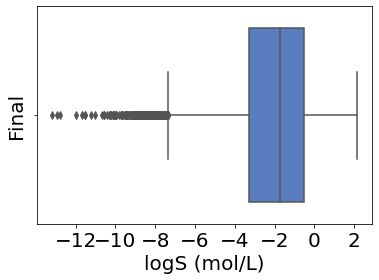

In [20]:
plt.rcParams["figure.figsize"] = (6, 4)
sns.boxplot(x=final_df[final_df['LogS'] != 'Unable']['LogS'], data=final_df, palette="muted", color='dodgerblue')
plt.xlabel('logS (mol/L)', fontsize=20)
plt.ylabel('Final', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

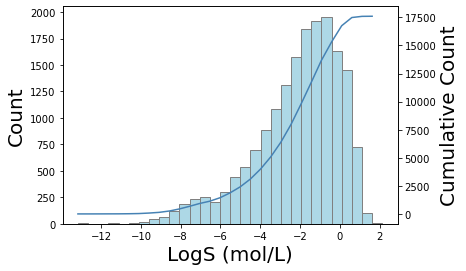

In [21]:
fig, ax1 = plt.subplots()
hists, bins = np.histogram(final_df['LogS'], bins=30)
plt.grid(False)

ax2 = ax1.twinx()
ax1.hist(final_df['LogS'], bins=30, color = 'lightblue', edgecolor = 'gray')
ax2.plot( bins[:-1], np.cumsum(hists), color = 'steelblue' )
ax1.set_xlabel('LogS (mol/L)', fontsize=20)
ax1.set_ylabel('Count', fontsize=20)
ax2.set_ylabel('Cumulative Count', fontsize=20)
plt.show()

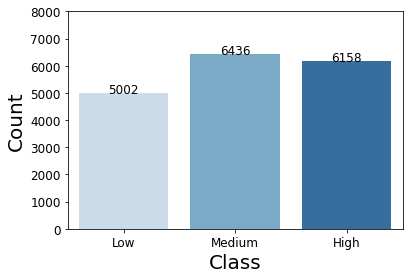

In [22]:
sns.countplot(x='Class', data=final_df, saturation=0.7, palette= 'Blues')
plt.xlabel('Class', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.ylim(0,8000)
plt.xticks([0,1,2], ['Low','Medium','High'], fontsize=12)
plt.yticks(fontsize=12)
count = final_df['Class'].value_counts()
for i in range(3):
    plt.text(x = i, y = count[i], s = count[i], horizontalalignment = 'center', fontsize=12)